In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data=pd.read_csv("../data/Mall_Customers.csv")

In [3]:
#first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
#desribe the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#check the data type of the dataset
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
#checking for the missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

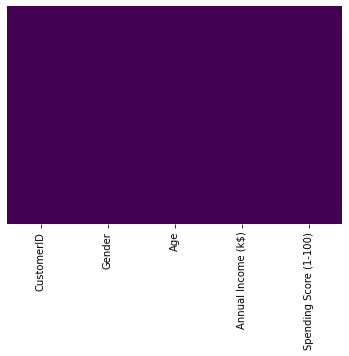

In [9]:
#bird eye view of dataframe and check whether we are having any missing value or not
sns.heatmap(customer_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
#compute pairwise correlation of columns excluding null values
customer_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0, 0.5, 'Count')

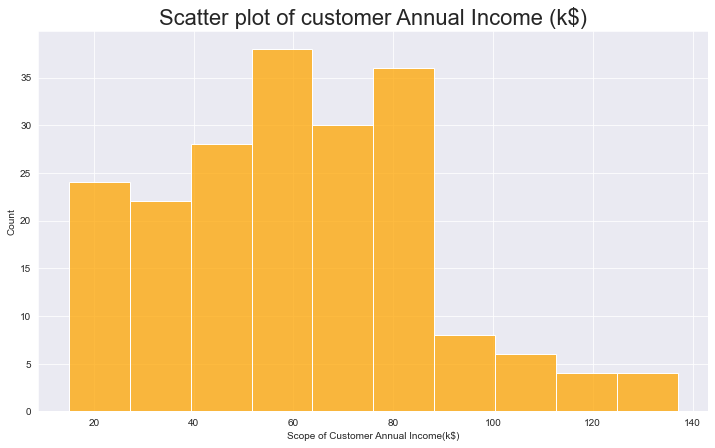

In [11]:
#Scatter plot of customer yearly Income
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
plt.xlabel('Scope of Customer Annual Income(k$)')
plt.title('Scatter plot of customer Annual Income (k$)', fontsize = 22)
sns.histplot(customer_data['Annual Income (k$)'], color="orange")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

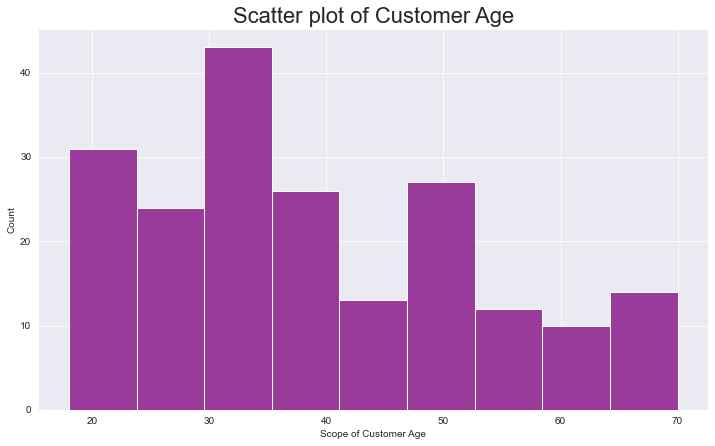

In [12]:
#Scatter plot of Customer age
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
plt.xlabel('Scope of Customer Age')
plt.title('Scatter plot of Customer Age', fontsize = 22)
sns.histplot(customer_data['Age'], color="purple")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

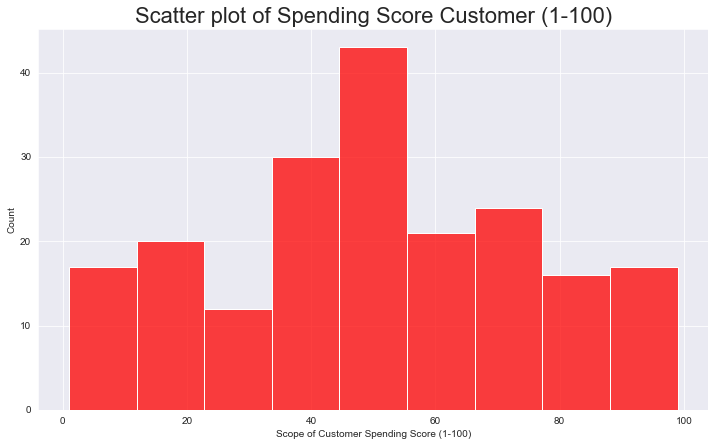

In [13]:
#Scatter plot of Customer spending score
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.histplot(customer_data['Spending Score (1-100)'], color="red")
plt.xlabel('Scope of Customer Spending Score (1-100)')
plt.title('Scatter plot of Spending Score Customer (1-100)', fontsize = 22)
plt.ylabel('Count')

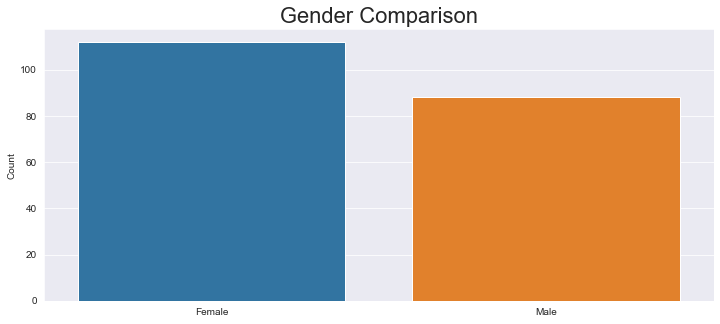

In [14]:
plt.figure(figsize=(12,5))
genders = customer_data.Gender.value_counts()
sns.barplot( y=genders.values ,x=genders.index)
plt.title('Gender Comparison', fontsize = 22)
sns.set_style("darkgrid")

plt.ylabel('Count')

plt.show()

In [15]:


df1 = customer_data[["Spending Score (1-100)","Annual Income (k$)"]]


In [16]:
df1.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


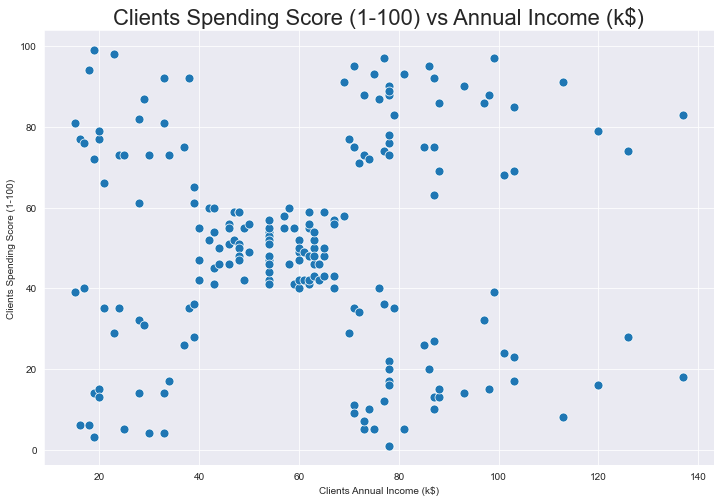

In [17]:

plt.figure(figsize=(12,8))
plt.title('Clients Spending Score (1-100) vs Annual Income (k$)',fontsize = 22)
plt.xlabel('Clients Annual Income (k$)')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = df1  ,s = 80 )
plt.ylabel('Clients Spending Score (1-100)') 
plt.show()

In [18]:
#Import k-means from sklearn
from sklearn.cluster import KMeans

In [19]:
#finding wcss value for different number of clusters

#Within Clusters Sum Of Squares - define the sum of squared distance between each member of cluster and its centroid
WCSS = []
OMP_NUM_THREADS=1

for i in range(1,11):
    k = KMeans(n_clusters = i,init ='k-means++',random_state = 42)
    #compute k-means clustering
    k.fit(df1)
    #sum of squared distance of samples to their closest cluster center,weighted by the sample weights provided
    WCSS.append(k.inertia_)


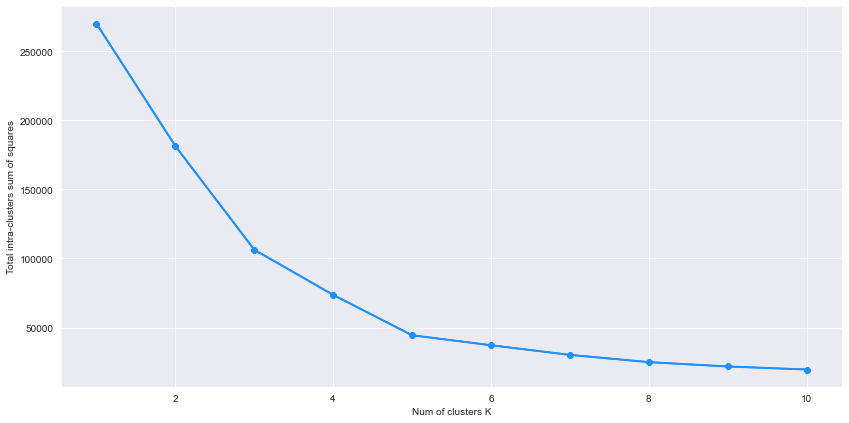

In [20]:
#elbow method
plt.figure(figsize=(14,7))
plt.plot(range(1,11),WCSS)
plt.plot(range(1,11),WCSS, linewidth = 2,color="dodgerblue",marker="8")
plt.xlabel("Num of clusters K")
sns.set_style("darkgrid")

#plt.xticks(np.arrange(1,11,1))
plt.ylabel("Total intra-clusters sum of squares")
plt.show()

In [21]:
#use no of 5 clusters 
km = KMeans(n_clusters = 5)
#input data fitting
km.fit(df1)
#compute cluster centers and predict cluster index for each input data
y = km.predict(df1)

df1["label"] = y

df1.head()

,Spending Score (1-100),Annual Income (k$),label
0,39,15,4
1,81,15,0
2,6,16,4
3,77,16,0
4,40,17,4


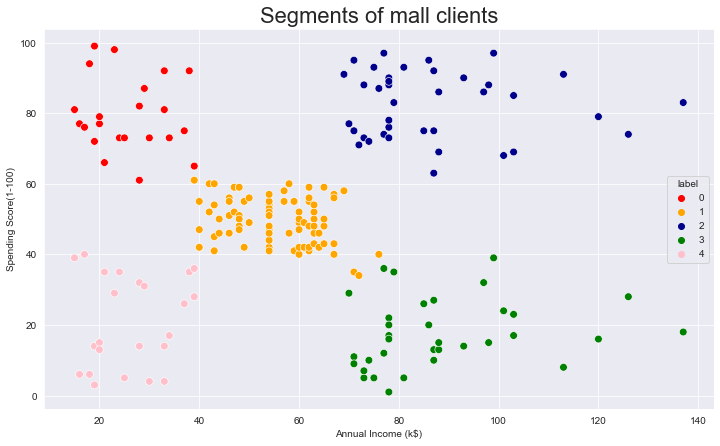

In [22]:
#scatterplot of clusters
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'label',
               palette = ['red','orange','darkblue','green','pink'],legend = 'full',data = df1,s=60)
plt.title('Segments of mall clients',fontsize='22')
plt.xlabel('Annual Income (k$)')
sns.set_style("darkgrid")
plt.ylabel('Spending Score(1-100)')

plt.show()

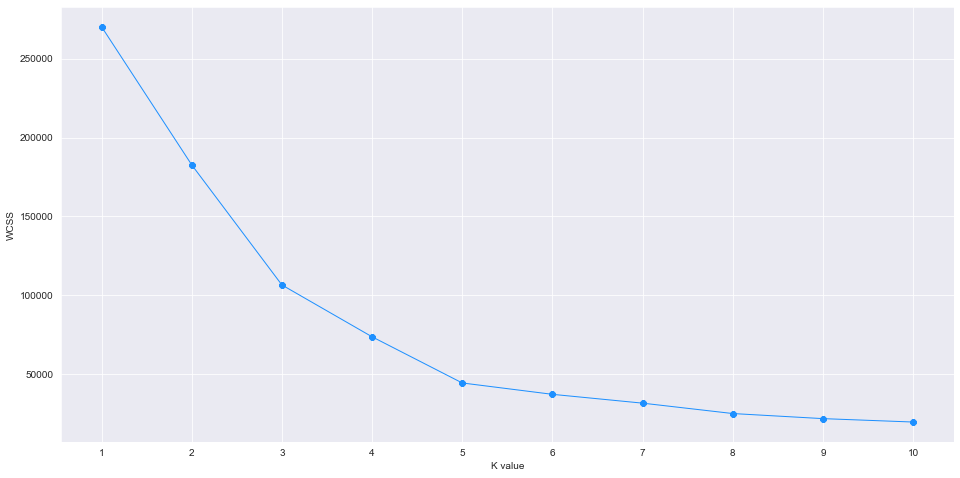

In [23]:

#For different k values the WCSS(Within Cluster Sum of Squared Errors) is calculated
wcss = []
OMP_NUM_THREADS=1

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (16,8))
plt.plot(range(1,11),wcss, linewidth = 1, color ="dodgerblue", marker = "8")
plt.xlabel("K value")

plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()
             

In [24]:
#value at where WSS begins to deterioate is chosen
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(df1)
df1["label"] = y2

#Label containing data
df1.head()

,Spending Score (1-100),Annual Income (k$),label
0,39,15,2
1,81,15,4
2,6,16,2
3,77,16,4
4,40,17,2


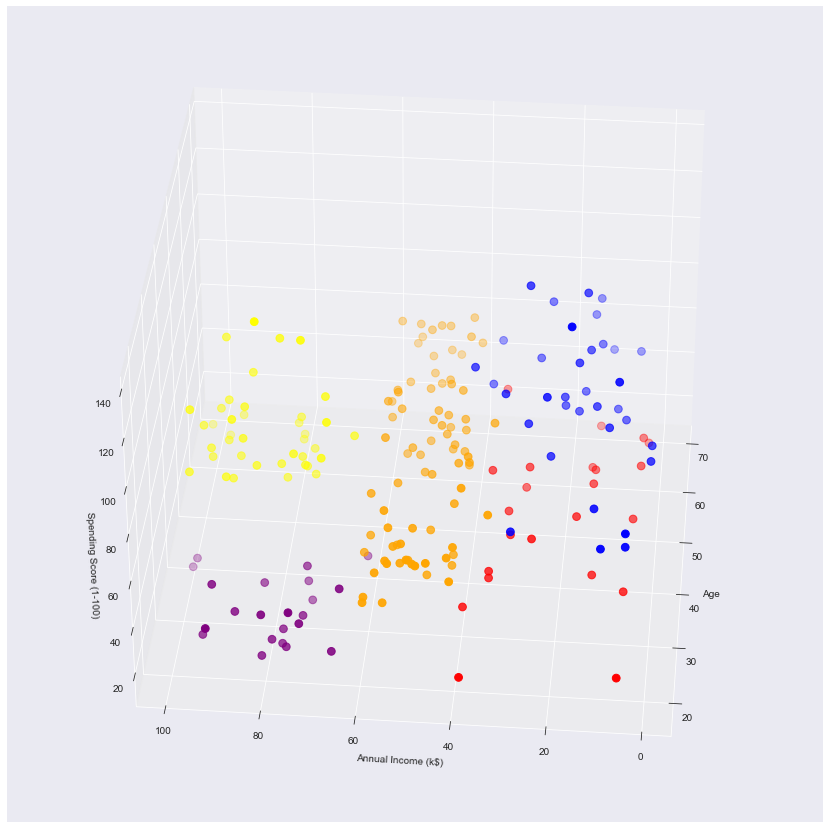

In [25]:
#3D plot on the 3 input features based clustering
df1=customer_data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df1["label"] = y2
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], c='orange', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], c='red', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], c='yellow', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], c='purple', s=60)
ax.view_init(35, 185)
ax.set_zlabel('Spending Score (1-100)')
plt.ylabel("Annual Income (k$)")

plt.xlabel("Age")
plt.show()

In [26]:
cusgroup1=df1[df1["label"]==1]
print('Group 1 customer count:', len(cusgroup1),'\nCustomer IDs:', cusgroup1["CustomerID"].values,"\n\n")

cusgroup2=df1[df1["label"]==2]
print('Group 2 customer count:', len(cusgroup2),'\nCustomer IDs:', cusgroup2["CustomerID"].values,"\n\n")
      
cusgroup3=df1[df1["label"]==0]
print('Group 3 customer count:', len(cusgroup3),'\nCustomer IDs:', cusgroup3["CustomerID"].values,"\n\n")

cusgroup4=df1[df1["label"]==3]
print('Group 4 customer count:', len(cusgroup4),'\nCustomer IDs:', cusgroup4["CustomerID"].values,"\n\n")

cusgroup5=df1[df1["label"]==4]
print('Group 5 customer count:', len(cusgroup5),'\nCustomer IDs:', cusgroup5["CustomerID"].values,"\n\n")

Group 1 customer count: 81 
Customer IDs: [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143] 


Group 2 customer count: 23 
Customer IDs: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45] 


Group 3 customer count: 35 
Customer IDs: [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199] 


Group 4 customer count: 39 
Customer IDs: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200] 


Group 5 customer count: 22 
Customer IDs: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46] 


